   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

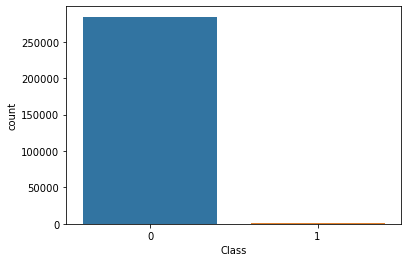

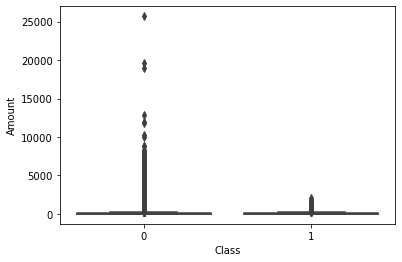

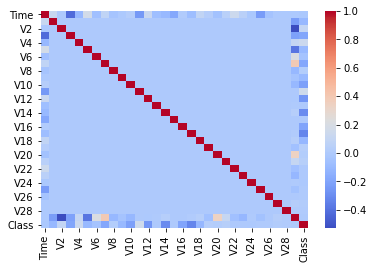

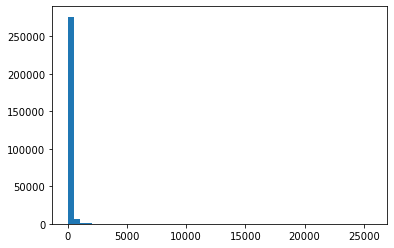

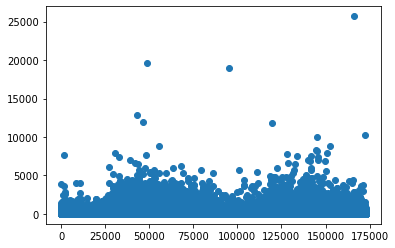

In [3]:
#1 - Visual and exploratory analysis - High level approach

#Import necessary libraries (e.g., pandas, numpy, seaborn, matplotlib, sklearn)
#Load the CSV file using pandas read_csv() function
#Explore the dataset using functions such as head(), describe(), info(), and isnull(). 
#This will give you an idea of the data types, number of observations, and possible missing values in the dataset.
#Visualize the data using matplotlib and seaborn. 
#For example, you can plot histograms or boxplots to explore the distribution of each variable and how it relates to the response variable 'Class'.
#Compute correlations between features using the corr() method of pandas dataframe and visualize it as a heatmap using seaborn. 
#This will help you identify any correlations between variables that can affect your modeling.

# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

# Load the CSV file
df = pd.read_csv('Creditcard.csv')

# Explore the dataset
print(df.head())
print(df.describe())
print(df.info())
print(df.isnull().sum())

# Visualize the data
sns.countplot(x='Class', data=df)
plt.show()

sns.boxplot(x='Class', y='Amount', data=df)
plt.show()

sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

plt.hist(df['Amount'], bins=50)
plt.show() 

plt.scatter(df['Time'], df['Amount']) 
plt.show() 

In [4]:
#2 - Model selection, training, and finalization - High level approach

#Split the dataset into training and testing sets using sklearn train_test_split() function.
#Select appropriate models for classification, such as Logistic Regression, Decision Tree, Random Forest, or Gradient Boosting.
#Train the models using the training dataset.
#Evaluate the models using various performance metrics such as accuracy, precision, recall, F1-score, and ROC-AUC. You can use the classification_report() and roc_auc_score() functions from sklearn.metrics to compute these metrics.
#Select the best-performing model based on the evaluation results and finalize it by training it on the entire dataset.


# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report, roc_auc_score

# Split the dataset into training and testing sets
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the models
models = [LogisticRegression(), SVC(kernel='linear', C=1.0)]
for model in models:
    model.fit(X_train, y_train)

# Evaluate the models
for model in models:
    y_pred = model.predict(X_test)
    print(f"Classification report for {model}:")
    print(classification_report(y_test, y_pred))
    print(f"ROC-AUC score for {model}: {roc_auc_score(y_test, y_pred)}")

# Select the best-performing model
#best_model = GradientBoostingClassifier()
#best_model.fit(X, y)
# Import necessary libraries
#from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
#param_grid = {
#    'learning_rate': [0.05, 0.1, 0.2],
#    'n_estimators': [50, 100, 200],
#    'max_depth': [3, 5, 7]
#}

Classification report for LogisticRegression():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC score for LogisticRegression(): 0.7803044930690339
Classification report for SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.60      0.30      0.40        98

    accuracy                           1.00     56962
   macro avg       0.80      0.65      0.70     56962
weighted avg       1.00      1.00      1.00     56962

ROC-AUC score for SVC(kernel='linear'): 0.64779211839491


In [ ]:
#3 - Model fine-tuning - High level approach

#Use GridSearchCV or RandomizedSearchCV from sklearn.model_selection to fine-tune the hyperparameters of the selected model. This will help you find the best combination of hyperparameters that maximizes the performance of the model.
#Evaluate the performance of the fine-tuned model using the same performance metrics as before.
#If the performance is not satisfactory, you can try using other models or feature engineering techniques to improve the performance.

# Fine-tune the model using GridSearchCV
grid_search = GridSearchCV(best_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X, y)
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")
